In [1]:
from deepface import DeepFace 
import cv2
import matplotlib.pyplot as plt

In [2]:
# Function to display images
def display_images(left_images, right_image):
    plt.figure(figsize=(15,5))

    for i, img_path in enumerate(left_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, len(left_images)+1, i+1)
        plt.imshow(img)
        plt.title(f"Left Image {i+1}")
    
    right_image = cv2.imread(right_image)
    right_image = cv2.cvtColor(right_image, cv2.COLOR_BGR2RGB)
    plt.subplot(1, len(left_images) + 1, len(left_images) + 1)
    plt.imshow(right_image)
    plt.title("Crime scene Image")

    plt.show()

In [3]:
left_images = ["C:\\Users\\Nikhil Darji\\Downloads\\rahul.jpg","D:\\project\\face-attributes-grouped\\train\\eyewear\\eyeglasses\\1a55d5d75f710f442aebb66ee62df7ec.jpg","D:\\project\\face-attributes-grouped\\train\eyewear\\eyeglasses\\1e95c8ac95d83d7622d28bbb5d5e5914.jpg"]
right_image = "C:\\Users\\Nikhil Darji\\Downloads\\rahul2.jpg"

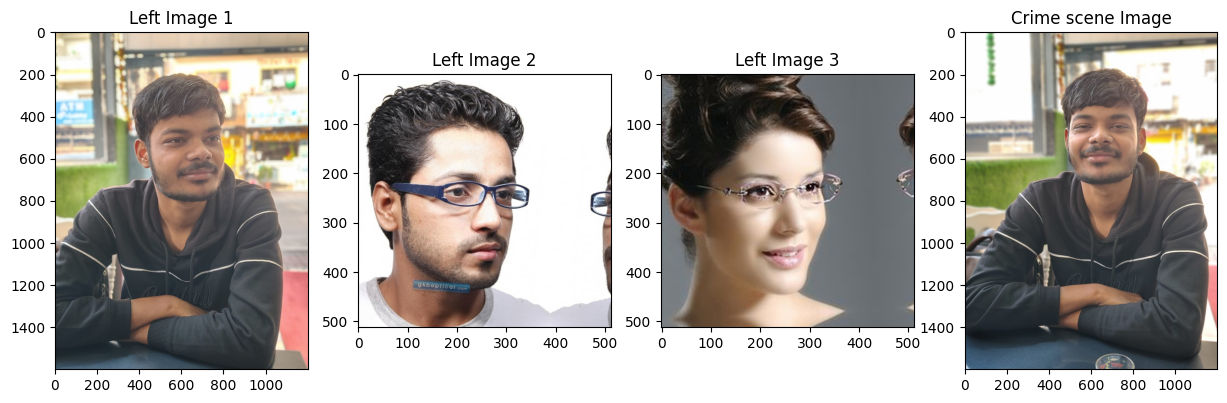

In [4]:
display_images(left_images, right_image)

In [5]:
from deepface import DeepFace  # Ensure you have this import

def compare_images(left_images, right_image):
    for i, img_path in enumerate(left_images):
        try:
            result = DeepFace.verify(img_path, right_image, model_name='VGG-Face')
            similarity = result["distance"]
            percentage_similarity = (1 - similarity) * 100  # Corrected variable name
            print(f"Is Image {i+1} the same person as the crime scene image? {result['verified']}")
            print(f"Percentage similarity: {percentage_similarity:.2f}%\n")
        except Exception as e:
            print(f"Error processing image {i+1} ({img_path}): {e}")

compare_images(left_images, right_image)


Is Image 1 the same person as the crime scene image? True
Percentage similarity: 79.92%

Is Image 2 the same person as the crime scene image? False
Percentage similarity: 16.90%

Is Image 3 the same person as the crime scene image? False
Percentage similarity: 16.92%



In [6]:
import pickle
results =  compare_images(left_images, right_image)
with open("deepface_results.pkl","wb") as file:
    pickle.dump(results, file)

print("Pickle file saved as deepface_results.pkl")

Is Image 1 the same person as the crime scene image? True
Percentage similarity: 79.92%

Is Image 2 the same person as the crime scene image? False
Percentage similarity: 16.90%

Is Image 3 the same person as the crime scene image? False
Percentage similarity: 16.92%

Pickle file saved as deepface_results.pkl


In [7]:
import pickle

with open("deepface_results.pkl", "rb") as file:
    loaded_results = pickle.load(file)

print("Loaded Results:", loaded_results)

Loaded Results: None


In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
import numpy as np

# Create a simple model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10,)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Generate some dummy data for training
X_train = np.random.rand(100, 10)
y_train = np.random.randint(2, size=(100, 1))

# Train the model
model.fit(X_train, y_train, epochs=5)

# Save the model
model.save("deepface_model.h5")
print("Model saved as deepface_model.h5")

# Load the model later
loaded_model = load_model("deepface_model.h5")
print("Model loaded successfully.")


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.4849 - loss: 0.6984
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5205 - loss: 0.6950
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5516 - loss: 0.6865 
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5890 - loss: 0.6851
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6117 - loss: 0.6824


Model saved as deepface_model.h5
Model loaded successfully.
